In [1]:
import sys

sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from mlresearch.utils import set_matplotlib_style
from recgame.environments import BankLoanApplication1
from recgame.populations import Population
from recgame.recourse import NFeatureRecourse
from recgame.utils import generate_synthetic_data

set_matplotlib_style(16)

# Some variables to define the problem
RNG_SEED = 42
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 100

# Environment variables
# TODO: K -> number of people or an array for each time step
THRESHOLD = 0.8
ADAPTATION = 0.2
# TODO: Fixed number (absolute) or an array for each time step
GROWTH_RATE = 0.2

# TODO: threshold drift metric
# TODO: population size visualization
# TODO: end and stop from updating when population becomes too small

In [3]:
# Generate data and fit regression
df, y, categorical = generate_synthetic_data(
    n_agents=N_AGENTS,
    n_continuous=N_CONTINUOUS,
    n_categorical=N_CAT,
    random_state=RNG_SEED,
)

lr = LogisticRegression().fit(df, y)

(array([ 2.,  3., 13., 18., 16., 20., 17.,  5.,  3.,  3.]),
 array([0.31059223, 0.35146955, 0.39234686, 0.43322417, 0.47410149,
        0.5149788 , 0.55585612, 0.59673343, 0.63761074, 0.67848806,
        0.71936537]),
 <BarContainer object of 10 artists>)

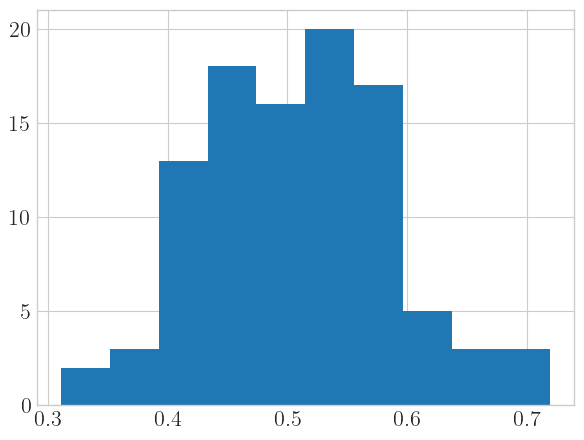

In [4]:
plt.hist(lr.predict_proba(df)[:, -1])

In [5]:
# Define the necessary components to run simulation
population = Population(df, categorical=categorical)
recourse = NFeatureRecourse(lr, n_features=2)
environment = BankLoanApplication1(
    population,
    recourse,
    threshold=THRESHOLD,
    adaptation=ADAPTATION,
    growth_rate=GROWTH_RATE,
    random_state=RNG_SEED,
)

environment.run_simulation(20)

BankLoanApplication1(growth_rate=0.3,
                     population=Population(X=         f_0       f_1
0   0.601572  0.153339
1   0.750150  0.813522
2  -0.150345  0.065940
3   0.542613  0.394586
4   0.494400  0.215652
..       ...       ...
95  1.074555  0.440160
96  0.372271  0.987148
97  0.130985  0.201758
98  0.714442  0.368465
99  0.498293  0.445519

[100 rows x 2 columns],
                                           categorical=[]),
                     random_state=42,
                     recourse=NFeatureRecourse(model=LogisticRegression(),
                                               n_features=2,
                                               threshold=0.5747335757035769))

<Axes: title={'center': 'Population scores over 21 time steps'}, xlabel='Step', ylabel='Score'>

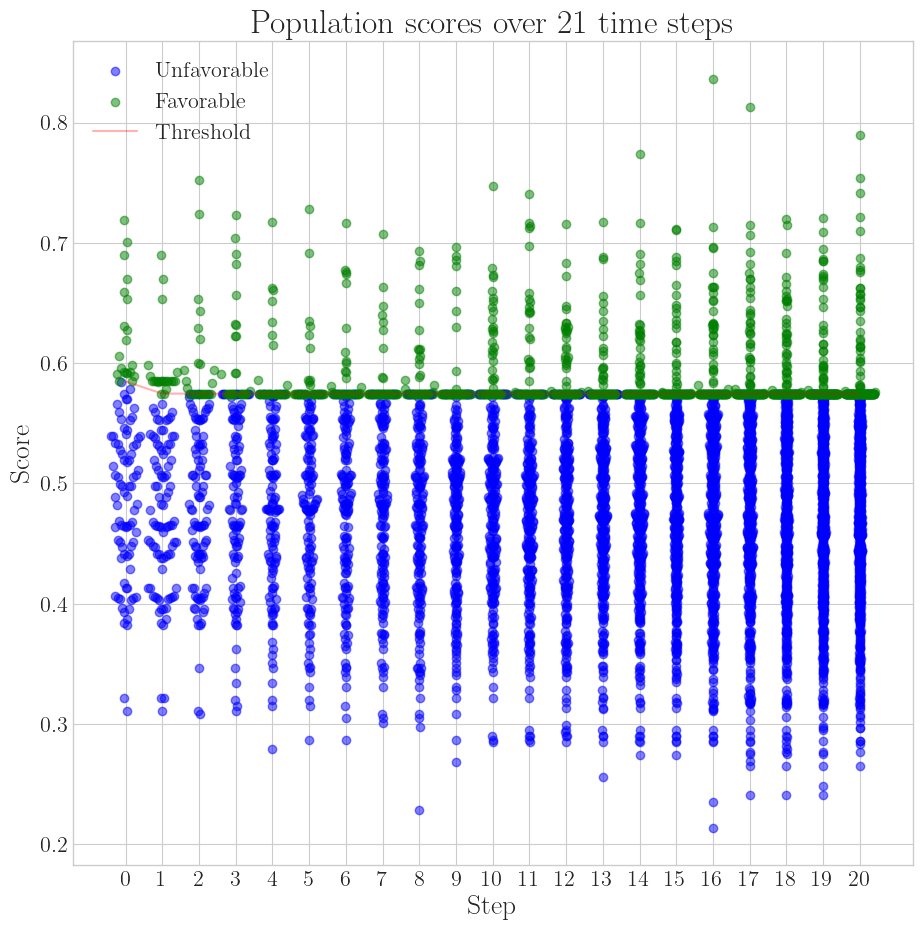

In [6]:
environment.plot.agent_scores()

<Axes: title={'center': 'Population at t=1'}, xlabel='f_0', ylabel='f_1'>

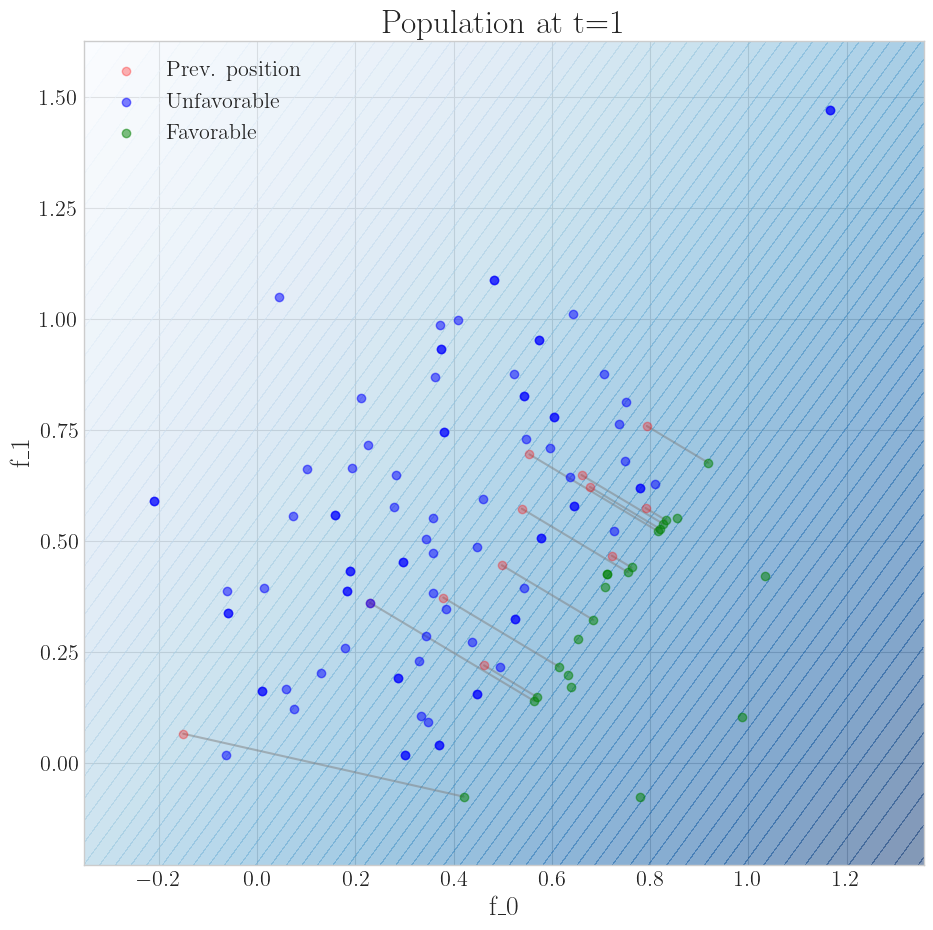

In [7]:
# environment.plot.scatter(1)
environment.plot.scatter(1)

<Axes: title={'center': 'Population size over 21 time steps'}, xlabel='Step', ylabel='Number of agents'>

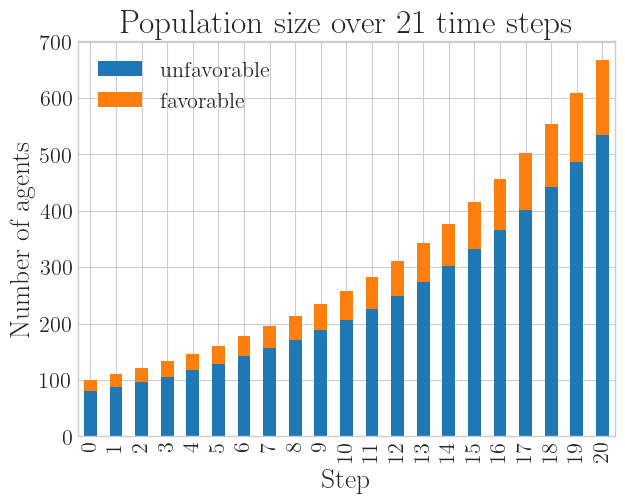

In [8]:
environment.plot.population_size()

# Additional Features

In [9]:
# A simple performance metric
environment.success_rate(1, 11)

array([1.        , 0.6875    , 0.57142857, 0.68421053, 0.80952381,
       0.76      , 0.75862069, 0.57692308, 0.74285714, 0.83333333])

(array([ 2.,  3., 13., 18., 16., 20., 17.,  5.,  3.,  3.]),
 array([0.31059223, 0.35146955, 0.39234686, 0.43322417, 0.47410149,
        0.5149788 , 0.55585612, 0.59673343, 0.63761074, 0.67848806,
        0.71936537]),
 <BarContainer object of 10 artists>)

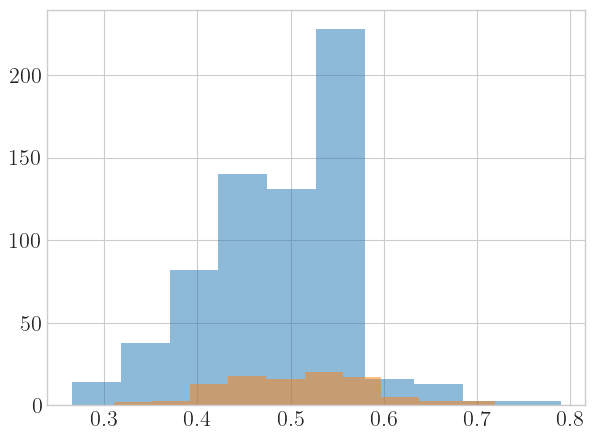

In [10]:
# Histogram with score distribution
environment.plot.scores_histogram(alpha=0.5)
environment.plot.scores_histogram(0, alpha=0.5)

<Axes: ylabel='Density'>

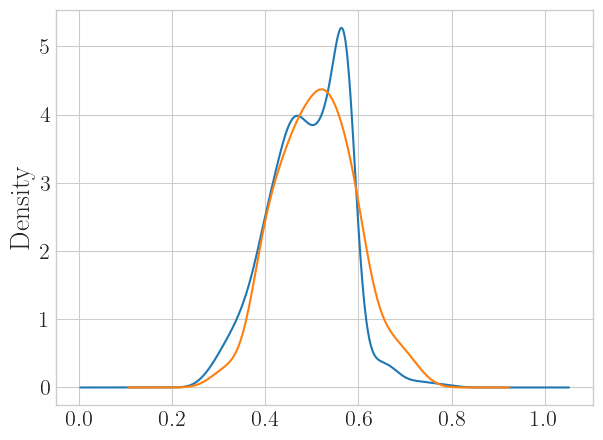

In [11]:
# KDE with score distribution
environment.plot.scores_kde()
environment.plot.scores_kde(0)

In [13]:
for i, meta in environment.metadata_.items():
    print(i, "\t", meta["population"].X.shape[0])

0 	 100
1 	 110
2 	 121
3 	 133
4 	 146
5 	 161
6 	 177
7 	 195
8 	 214
9 	 235
10 	 258
11 	 283
12 	 311
13 	 342
14 	 377
15 	 415
16 	 456
17 	 502
18 	 553
19 	 608
20 	 668


In [15]:
[meta["threshold"] for meta in environment.metadata_.values()]

[0.5848259831074815,
 0.5747335757035769,
 0.5747335757035769,
 0.5747335757035769,
 0.5747335757035769,
 0.5747335757035769,
 0.5747335757035769,
 0.5747335757035769,
 0.5747335757035769,
 0.5747335757035769,
 0.5747335757035769,
 0.5747335757035769,
 0.5747335757035769,
 0.5747335757035769,
 0.5747335757035769,
 0.5747335757035769,
 0.5747335757035769,
 0.5747335757035769,
 0.5747335757035769,
 0.5747335757035769,
 0.5747335757035769]